Analysis of ant colony optimisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time 

def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def aco(points,ants,iters,alpha,beta,evapo_rate,Q):
    # print(points)
    npoints=len(points)
    pheromone=np.ones((npoints,npoints))
    best_path=None
    best_path_length= np.inf
    
    for iteration in range(iters):
        paths=[]
        path_lengths=[]
        
        for ant in range(ants):
            visited=[False]*npoints
            curr_point=np.random.randint(npoints)
            # print(curr_point)
            visited[curr_point]=True
            path=[curr_point]
            path_length=0
            
            while False in visited:
                unvisit=np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisit))
                # print(unvisit)
                for i,unvis in enumerate(unvisit):
                      probabilities[i] = (pheromone[curr_point, unvis]**alpha)*((1/distance(points[curr_point], points[unvis]))**beta)
                    
                
                probabilities/=np.sum(probabilities)
                
                next_point=np.random.choice(unvisit,p=probabilities)   
                path.append(next_point)
                path_length+=distance(points[curr_point], points[next_point])
                visited[next_point]=True
                curr_point=next_point
            paths.append(path)
            
            path_lengths.append(path_length)
            if path_length<best_path_length:
                best_path=path
                best_path_length=path_length
                
        pheromone*=evapo_rate    
        for path,path_length in zip(paths,path_lengths):
                for i in range(npoints-1):
                    pheromone[path[i],path[i+1]]+=Q/path_length
                pheromone[path[-1], path[0]] += Q/path_length
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.scatter(points[:,0], points[:,1], c='r', marker='o')
    
    for i in range(npoints-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            c='g', linestyle='-', linewidth=2, marker='o')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label') 
    return best_path_length
    
                    


data=[[559.6, 404.8],
[451.6, 186.0],
[698.8, 239.6],
[204.0, 243.2],
[590.8, 263.2],
[389.2, 448.4],
[179.6, 371.2],
[719.6, 205.2],
[489.6, 442.0],
[80.0, 139.2],
[469.2, 367.2],
[673.2, 293.6],
[501.6, 409.6]]

data_array = np.array(data)
                        
points=data_array


Analysis of distance vs number of ants

Analysis of number of ants is a crucial parameter number of ants decide the quality of exploration of solution space 

The challenge is to optimise the time(cost function) with the change of parameters of ant colony optimisation  

2.3345489501953125


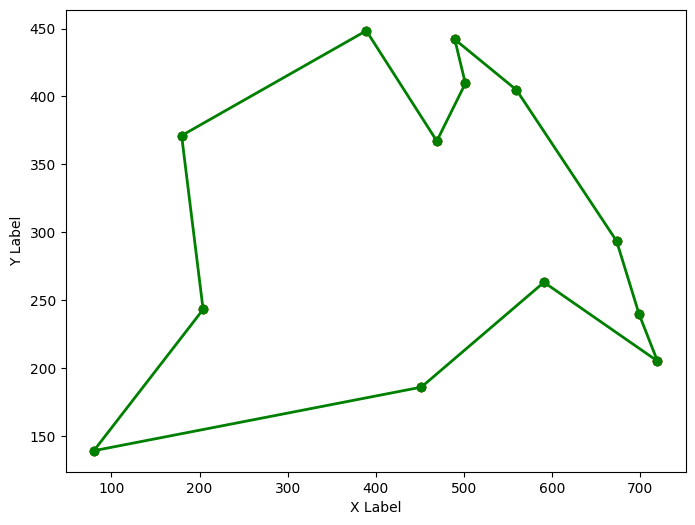

In [3]:
start_time = time.time()
aco(points, 64, 50, 1, 1, 0.5, 1)
end_time = time.time()
print(end_time-start_time)

0.06344103813171387
0.07698440551757812
0.15575385093688965
0.31328320503234863
0.6037688255310059
1.2760660648345947
2.200141191482544
3.894867420196533
7.4403977394104
15.093542337417603
33.00745940208435


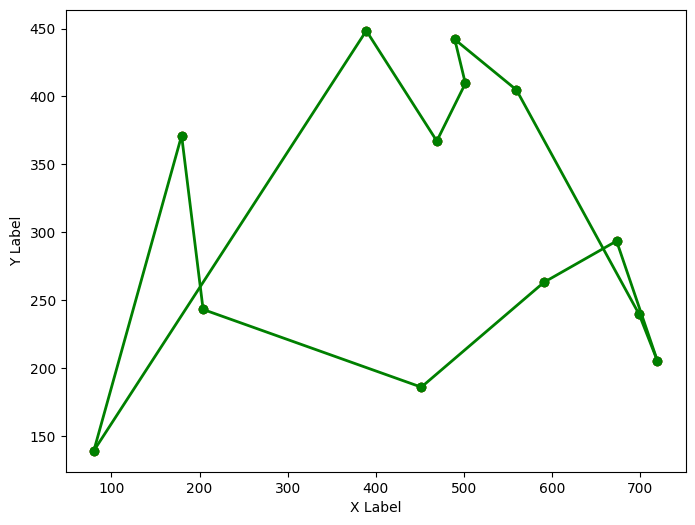

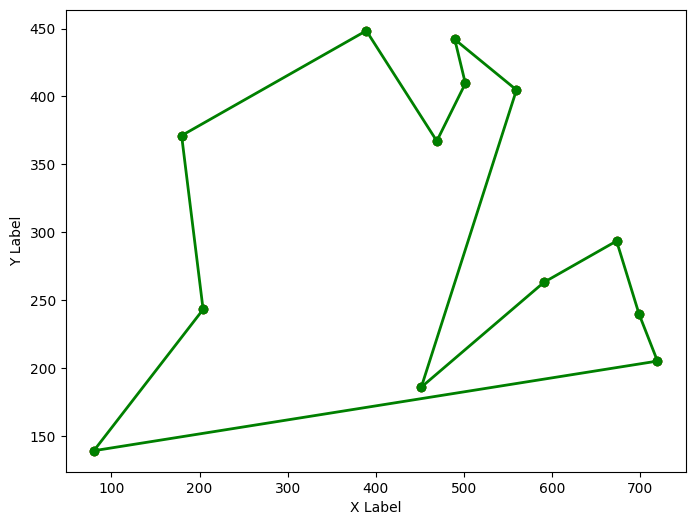

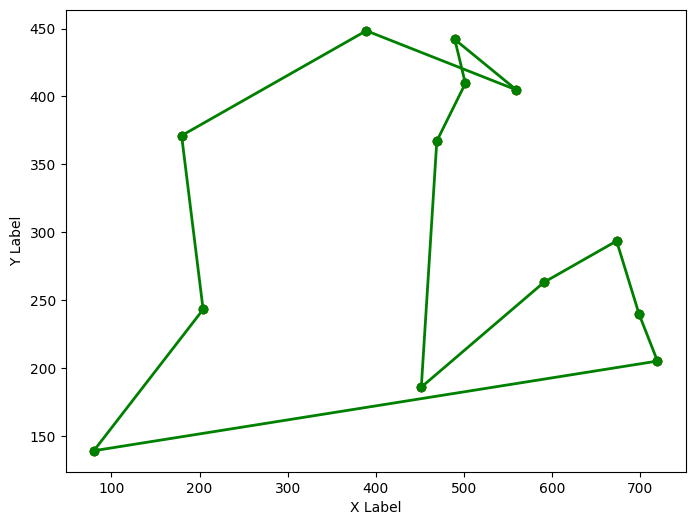

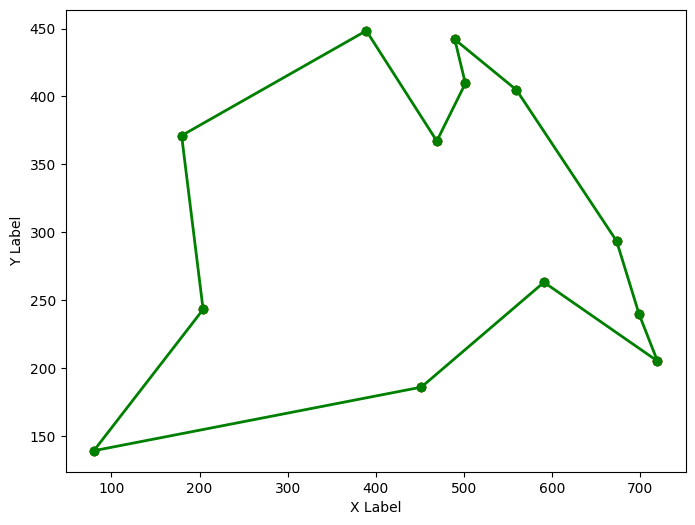

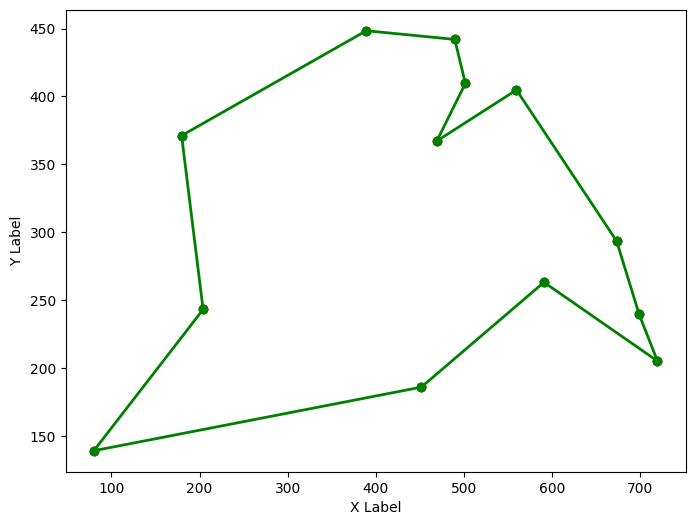

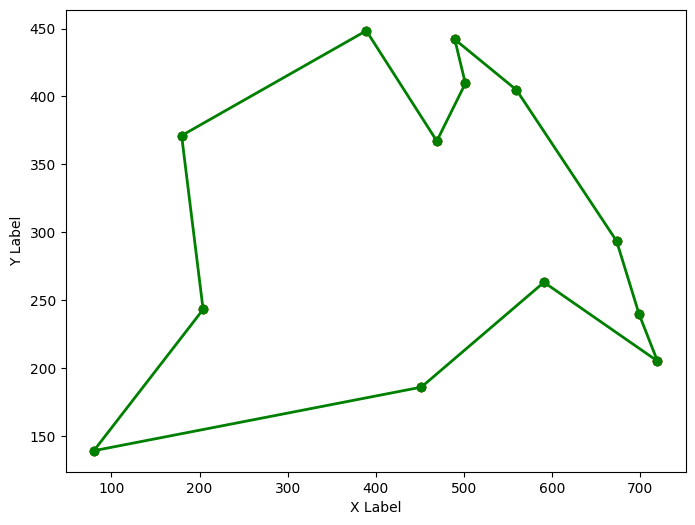

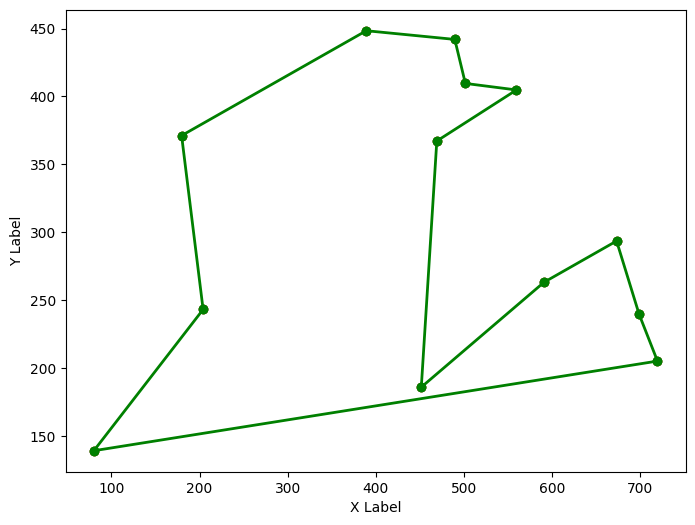

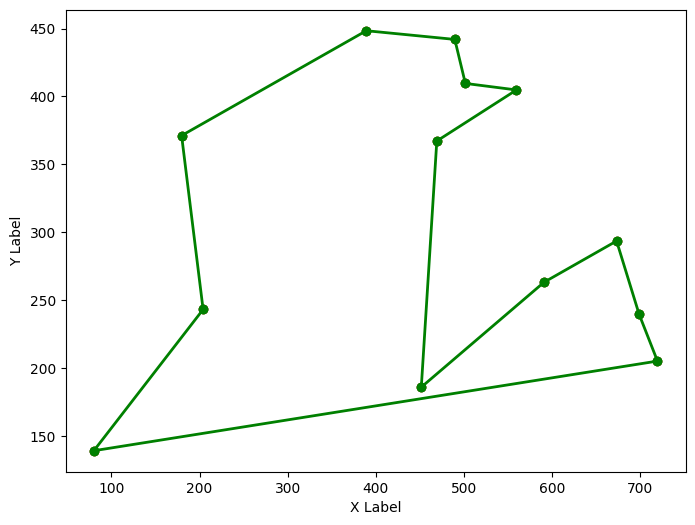

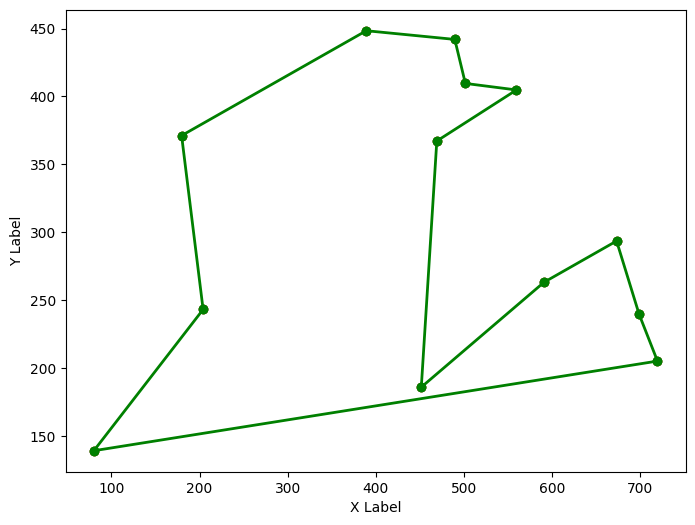

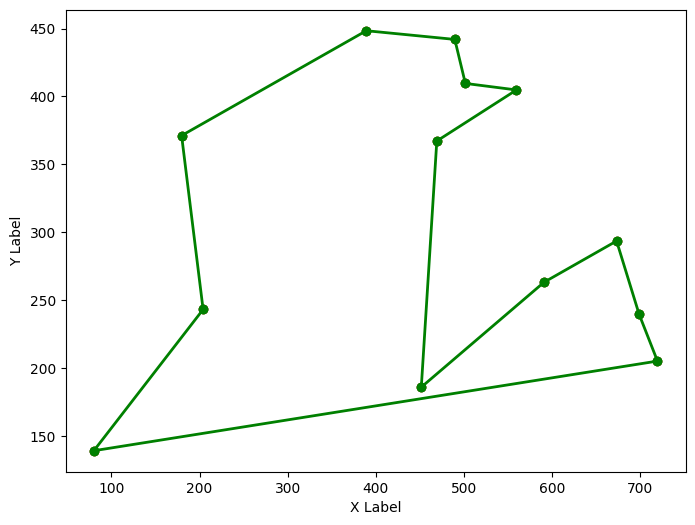

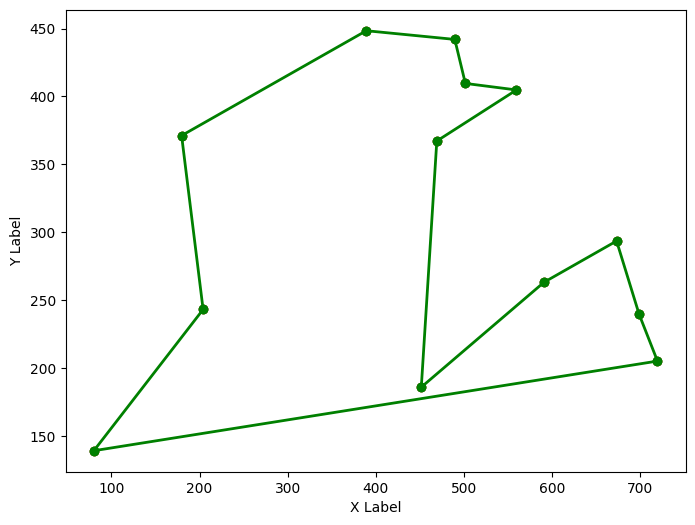

In [4]:
ants= []  
pat = []  
time_values = []  

i = 1

while i <= 1024:
    start_time = time.time()
    pat.append(aco(points, i, 50, 1, 4, 0.5, 1))
    end_time = time.time()
    ants.append(i)
    time_values.append(end_time - start_time)
    print(end_time - start_time)
    i = i * 2

{1: 1521.1419005307832, 2: 1387.64851409574, 4: 1387.5990423015312, 8: 1356.0399477066012, 16: 1361.2919897056659, 32: 1356.0399477066012, 64: 1335.7864677890414, 128: 1335.7864677890414, 256: 1335.7864677890414, 512: 1335.7864677890414, 1024: 1335.7864677890414}


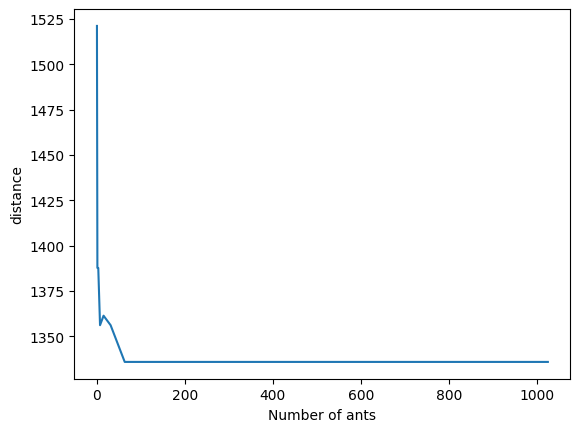

In [5]:
ant_dict=dict(zip(ants,pat))
print(ant_dict)
plt.plot(ants, pat)
plt.xlabel('Number of ants')
plt.ylabel('distance')
plt.show()

so 8 ants is the optimum value for the number of ants 

Text(0, 0.5, 'time_values')

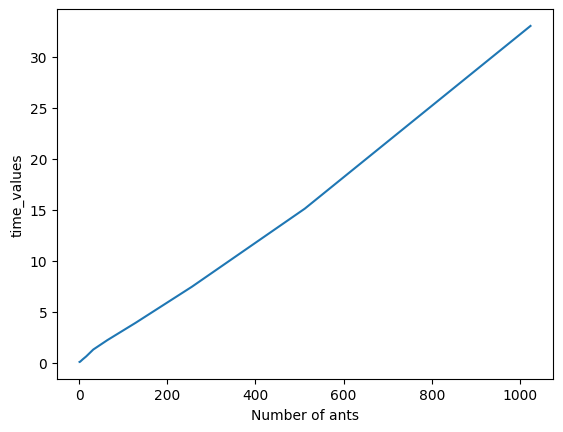

In [6]:
plt.plot(ants,time_values)
plt.xlabel('Number of ants')
plt.ylabel('time_values')

As you can see the computation time directly increase with the number of ants taken
so to decrease the time and cost of compuation we take move on with 8 ants 
  

The role of beta and alpha in ant colony optimisation


(-0.5, 1279.5, 719.5, -0.5)

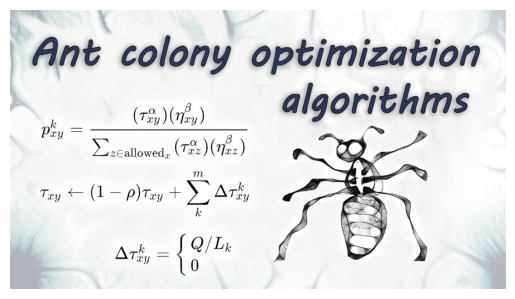

In [7]:
import matplotlib.image as mpimg
img = mpimg.imread('ant_algo.jpg')
plt.imshow(img)
plt.axis('off')

τij  is the pheromone level on the edge between routes i and j.
ηij is a heuristic value representing the desirability of moving from vertex i to vertex j. 
α and β are parameters that control the influence of pheromone and heuristic information, respective.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time 

def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

shortest_path_dist = 1335
def acob(points,ants,iters,alpha,beta,evapo_rate,Q):
    # print(points)
    npoints=len(points)
    pheromone=np.ones((npoints,npoints))
    best_path=None
    best_path_length=1335
    
    for iteration in range(iters):
        paths=[]
        path_lengths=[]
        
        for ant in range(ants):
            visited=[False]*npoints
            curr_point=np.random.randint(npoints)
            # print(curr_point)
            visited[curr_point]=True
            path=[curr_point]
            path_length=0
            
            while False in visited:
                unvisit=np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisit))
                # print(unvisit)
                for i,unvis in enumerate(unvisit):
                      probabilities[i] = (pheromone[curr_point, unvis]**alpha)*((1/distance(points[curr_point], points[unvis]))**beta)
                    
                
                probabilities/=np.sum(probabilities)
                
                next_point=np.random.choice(unvisit,p=probabilities)   
                path.append(next_point)
                path_length+=distance(points[curr_point], points[next_point])
                visited[next_point]=True
                curr_point=next_point
            paths.append(path)
            
            path_lengths.append(path_length)
            if path_length<1335:
                best_path_length=1335
                print("reached")
                return
                
        pheromone*=evapo_rate    
        for path,path_length in zip(paths,path_lengths):
                for i in range(npoints-1):
                    pheromone[path[i],path[i+1]]+=Q/path_length
                pheromone[path[-1], path[0]] += Q/path_length
    return best_path_length
    

In [9]:
betaa = []  
time_values = []  
i = 1

while i <= 10:
    start_time = time.time()
    acob(points, 8, 1000, 1, i, 0.5, 1) 
    end_time = time.time()
    time_values.append(end_time - start_time)
    betaa.append(i)
    i = i + 1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[4.380234718322754, 4.204896450042725, 4.1658570766448975, 4.173726320266724, 4.2196033000946045, 4.232942819595337, 4.257999658584595, 4.303022861480713, 4.34272837638855, 4.3965020179748535]
10
10


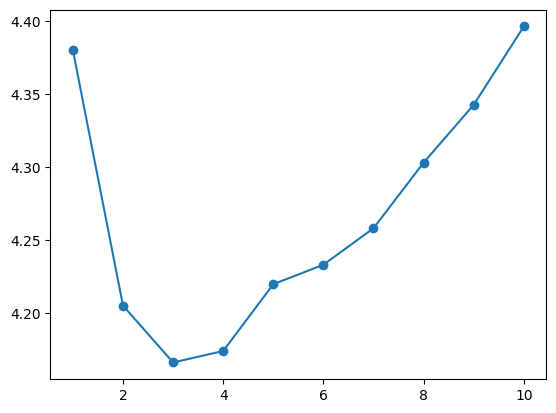

In [8]:
print(betaa)
print(time_values)
print(len(betaa))
print(len(time_values))
plt.plot(betaa, time_values, marker='o')

As beta increases, the influence of the heuristic information (η) becomes more prominent in comparison to the pheromone information (τ). This might lead to increased exploration of the search space, allowing the algorithm to discover new, potentially better solutions
At a certain point, the increase in beta might reach a threshold where the influence of the heuristic information dominates to an extent that is less conducive to finding good solutions. This could lead to a decrease in the algorithm's performance.
If beta continues to increase, the algorithm might become too focused on exploration, neglecting the exploitation of known good solutions. This could result in an increase in the time taken to find a solution.

In [120]:
beta2=[]
beta3=[]
beta4=[]
nant=[]

    
i=2
while(i<=4):
   for j in range(0,10):     
     start_time =time.time()
     acob(points,j, 1000,1,i,0.5,1) 
     end_time = time.time()
     if(i==2):
         beta2.append(end_time - start_time)
     if(i==3):
         beta3.append(end_time - start_time)
     if(i==4):
         beta4.append(end_time - start_time)        
   i = i + 1
    

1335.7864677890416
0.9262228012084961


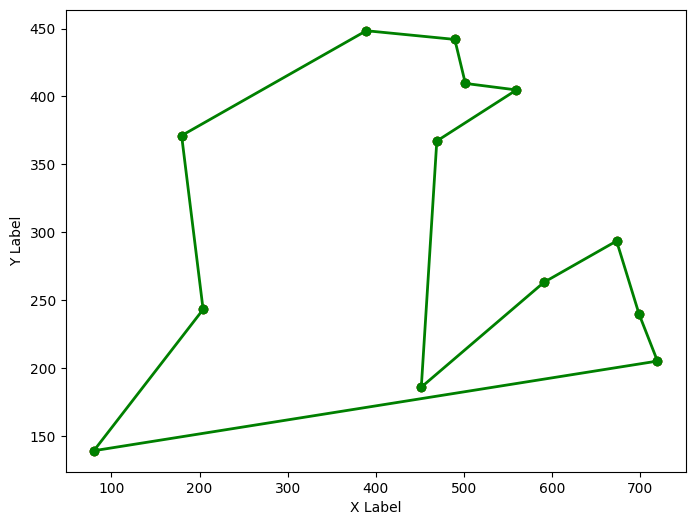

In [12]:
start_time = time.time()
print(aco(points, 32, 50, 1, 3, 0.5, 1))
end_time = time.time()
print(end_time-start_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


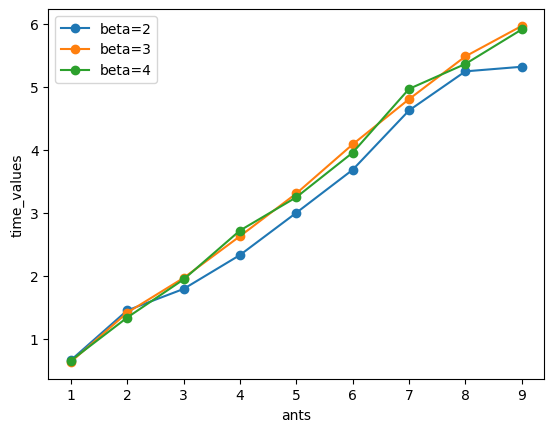

In [103]:
# nant=[]
# for i in range(1,10):
#     nant.append(i)
# print(nant)
# # print(len(beta2[1:10]))
# print(beta3)
# print(beta4)
# plt.plot(nant,beta2[1:10],marker='o',label='beta=2')
# plt.plot(nant,beta3[1:10],marker='o',label='beta=3')
# plt.plot(nant,beta4,marker='o',label='beta=4')
# plt.xlabel("ants")
# plt.ylabel("time_values")
# plt.legend()
# plt.show()
